#Heart Failure

Import Packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense, Input, Dropout
from keras.optimizers import SGD
from keras.models import Model
from sklearn.metrics import confusion_matrix, accuracy_score

Mounting to drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Import Dataset

In [ ]:
data = pd.read_csv('/content/drive/My Drive/Data jst/heart_failure_clinical_records_dataset.csv')

#Preprocessing

In [ ]:
#lihat data sekilas dan cek missing value
data.info()
# data.isnull().sum()
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


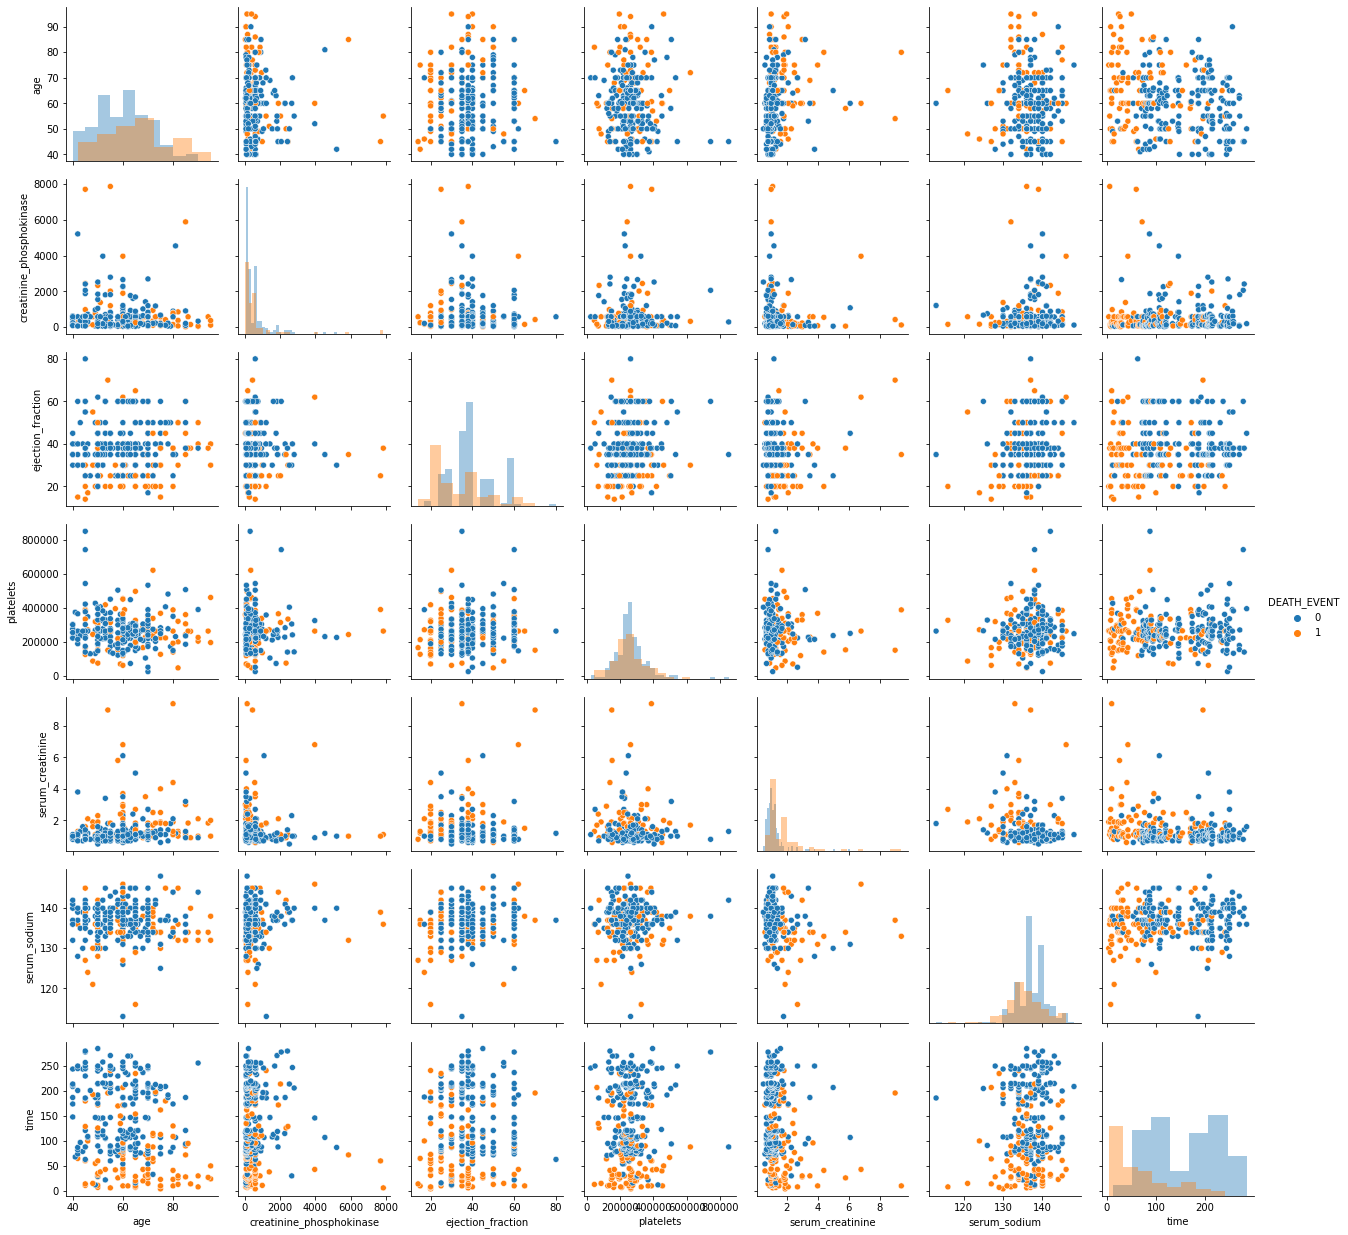

In [ ]:
#lihat persebaran feature yang berskala numerik
g = sns.PairGrid(data, vars = ["age", "creatinine_phosphokinase",
                               "ejection_fraction",'platelets','serum_creatinine', 'serum_sodium',
                               'time'], hue='DEATH_EVENT')
g.map_diag(sns.distplot, kde = False)
g.map_offdiag(sns.scatterplot)
g.add_legend()

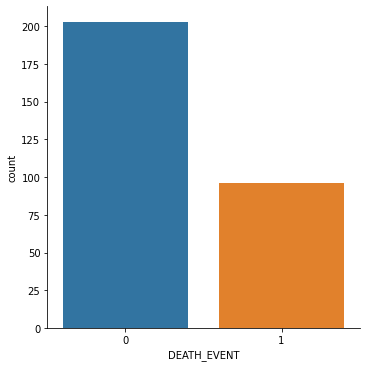

In [ ]:
sns.catplot(kind='count', x='DEATH_EVENT', data=data)

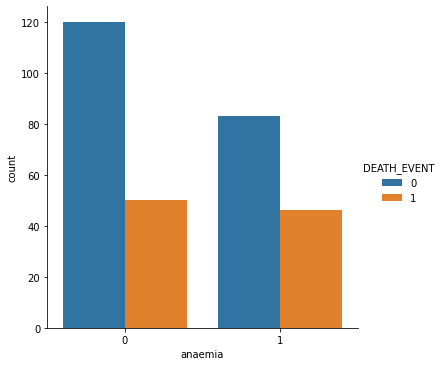

In [ ]:
#lihat persebaran data yang berskala kategorik
sns.catplot(kind='count', x='anaemia', data=data, hue='DEATH_EVENT')

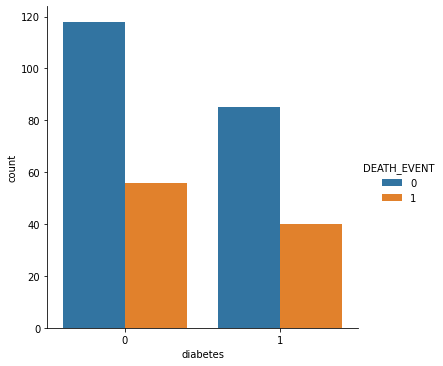

In [ ]:
sns.catplot(kind='count', x='diabetes', data=data, hue='DEATH_EVENT')

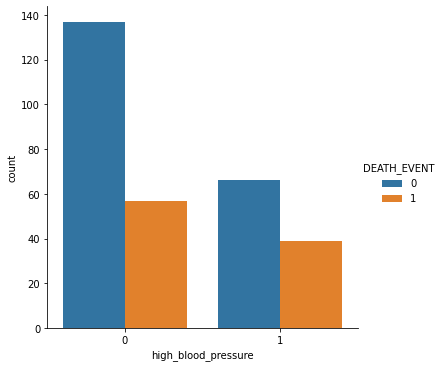

In [ ]:
sns.catplot(kind='count', x='high_blood_pressure', data=data, hue='DEATH_EVENT')

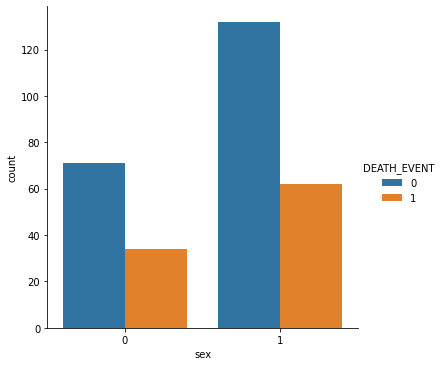

In [ ]:
sns.catplot(kind='count', x='sex', data=data, hue='DEATH_EVENT')

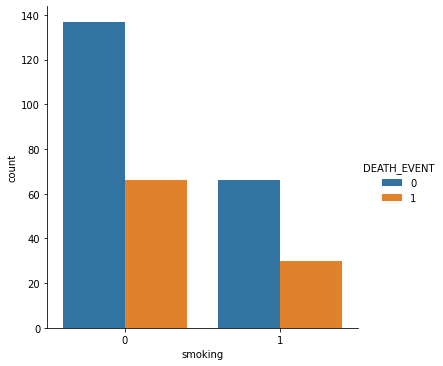

In [ ]:
sns.catplot(kind='count', x='smoking', data=data, hue='DEATH_EVENT')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


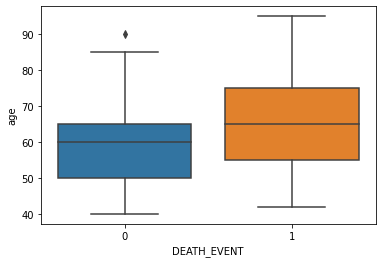

In [ ]:
sns.boxplot('DEATH_EVENT','age', data = data)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


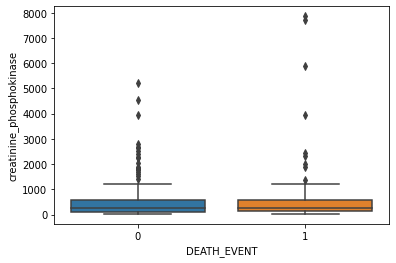

In [ ]:
sns.boxplot('DEATH_EVENT','creatinine_phosphokinase', data = data)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn

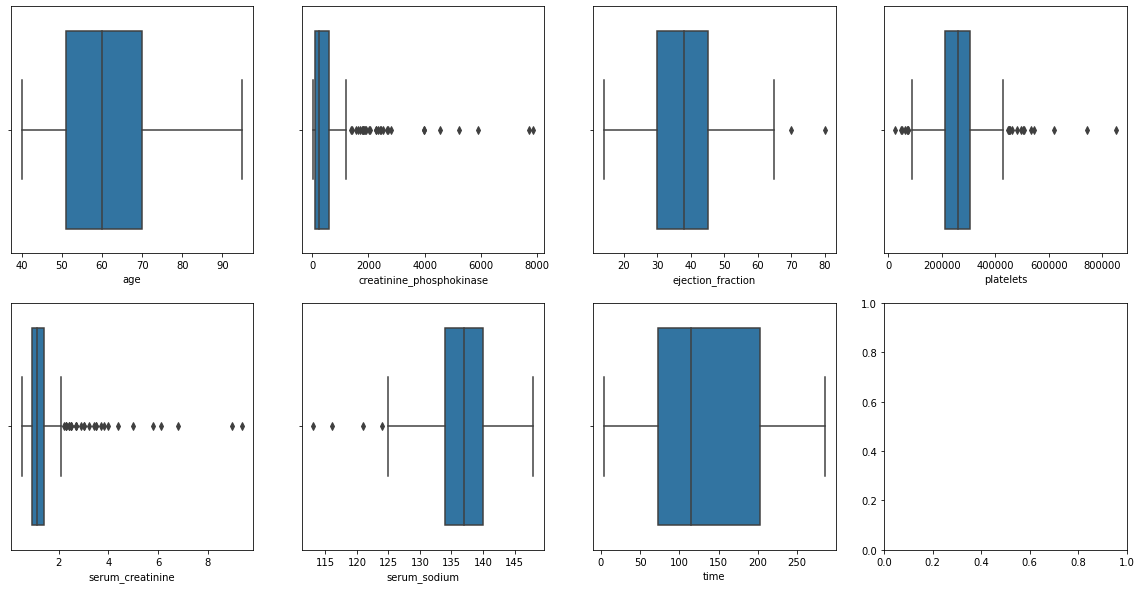

In [ ]:
#lihat boxplot feature yang numerik
f, ax = plt.subplots(2,4,figsize=(20,10))
sns.boxplot('age', data=data, ax = ax[0,0])
sns.boxplot('creatinine_phosphokinase', data = data, ax = ax[0,1])
sns.boxplot('ejection_fraction', data = data, ax = ax[0,2])
sns.boxplot('platelets', data = data, ax = ax[0,3])
sns.boxplot('serum_creatinine', data = data, ax = ax[1,0])
sns.boxplot('serum_sodium', data = data, ax = ax[1,1])
sns.boxplot('time', data = data, ax = ax[1,2])

In [ ]:
#Split dataset to training - testing
data_train, data_test = train_test_split(data, test_size = 0.2, random_state = 123, stratify = data["DEATH_EVENT"])
x_train = data_train.drop('DEATH_EVENT', axis=1)
y_train = data_train.DEATH_EVENT
x_test = data_test.drop('DEATH_EVENT', axis = 1)
y_test = data_test.DEATH_EVENT

In [ ]:
#feature scaling
scaler = MinMaxScaler()
x_train[["age", "creatinine_phosphokinase", "ejection_fraction",
        'platelets','serum_creatinine', 'serum_sodium','time']] = scaler.fit_transform(x_train[["age", "creatinine_phosphokinase","ejection_fraction",
                                                                                      'platelets','serum_creatinine', 'serum_sodium','time']])

In [ ]:
y_train

275    0
71     0
191    0
221    0
30     1
      ..
2      1
104    0
173    0
79     0
103    0
Name: DEATH_EVENT, Length: 239, dtype: int64

In [ ]:
#dijadikan np.array
x_train = np.array(x_train)
y_train = np.array(y_train)

##Let's go to ANN

In [ ]:
input_layer = Input(shape=(12,))
dense1 = Dense(6, activation='relu')(input_layer)
dropout1 = Dropout(0.2)(dense1)
dense2 = Dense(12, activation='relu')(dropout1)
dropout2 = Dropout(0.2)(dense2)
dense3 = Dense(6, activation='relu')(dropout2)
dropout3 = Dropout(0.2)(dense3)
output_layer = Dense(1, activation='sigmoid')(dropout3)

In [ ]:
model = Model(inputs=input_layer, outputs=output_layer)
from keras import optimizers
# import tensorflow as tf
opt = optimizers.SGD(learning_rate=0.01)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics = 'accuracy')
model.summary()

Model: "functional_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 12)]              0         
_________________________________________________________________
dense_10 (Dense)             (None, 6)                 78        
_________________________________________________________________
dropout_7 (Dropout)          (None, 6)                 0         
_________________________________________________________________
dense_11 (Dense)             (None, 12)                84        
_________________________________________________________________
dropout_8 (Dropout)          (None, 12)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 6)                 78        
_________________________________________________________________
dropout_9 (Dropout)          (None, 6)                

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_train_smote, y_train_smote = smote.fit_sample(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
#fitting and evaluate the model
model.fit(x_train_smote, y_train_smote, epochs=500, batch_size=50)
_, accuracy = model.evaluate(x_train_smote, y_train_smote)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/500
7/7 [==============================] - 0s 1ms/step - loss: 0.4024 - accuracy: 0.8210
Epoch 2/500
7/7 [==============================] - 0s 1ms/step - loss: 0.3807 - accuracy: 0.8488
Epoch 3/500
7/7 [==============================] - 0s 1ms/step - loss: 0.4268 - accuracy: 0.8179
Epoch 4/500
7/7 [==============================] - 0s 1ms/step - loss: 0.4226 - accuracy: 0.8272
Epoch 5/500
7/7 [==============================] - 0s 1ms/step - loss: 0.4410 - accuracy: 0.8395
Epoch 6/500
7/7 [==============================] - 0s 1ms/step - loss: 0.4258 - accuracy: 0.8395
Epoch 7/500
7/7 [==============================] - 0s 1ms/step - loss: 0.3906 - accuracy: 0.8704
Epoch 8/500
7/7 [==============================] - 0s 1ms/step - loss: 0.4227 - accuracy: 0.8395
Epoch 9/500
7/7 [==============================] - 0s 1ms/step - loss: 0.4080 - accuracy: 0.8395
Epoch 10/500
7/7 [==============================] - 0s 1ms/step - loss: 0.3910 - accuracy: 0.8549
Epoch 11/500
7/7 [===========

In [ ]:
24*12+24

312

In [ ]:
#scaling data testing
x_test[["age", "creatinine_phosphokinase", "ejection_fraction",
        'platelets','serum_creatinine', 'serum_sodium','time']] = scaler.fit_transform(x_test[["age", "creatinine_phosphokinase","ejection_fraction",
                                                                                      'platelets','serum_creatinine', 'serum_sodium','time']])

In [ ]:
#ubah ke np.array
x_test = np.array(x_test)
y_test = np.array(y_test)

In [ ]:
prediksi = model.predict(x_test)

In [ ]:
prediksi

array([[0.16273904],
       [0.99694085],
       [0.16273904],
       [0.979975  ],
       [0.974832  ],
       [0.9999954 ],
       [0.867     ],
       [0.6501844 ],
       [0.9101308 ],
       [0.16273904],
       [0.16273904],
       [0.1859214 ],
       [0.16273904],
       [0.16273904],
       [0.19835764],
       [0.16273904],
       [0.16273904],
       [0.9328346 ],
       [0.16273904],
       [0.16273904],
       [0.16273904],
       [0.16273904],
       [0.6737938 ],
       [0.9890096 ],
       [0.6285043 ],
       [0.32309198],
       [0.16273904],
       [0.61486167],
       [0.65649265],
       [0.16273904],
       [0.28472465],
       [0.9883045 ],
       [0.9979056 ],
       [0.16273904],
       [0.16273904],
       [0.73301697],
       [0.9831917 ],
       [0.60454917],
       [0.8600478 ],
       [0.16273904],
       [0.81485164],
       [0.7290626 ],
       [0.16273904],
       [0.16273904],
       [0.40889156],
       [0.16273904],
       [0.16273904],
       [0.696

In [ ]:
prediksi[prediksi<0.5] = 0
prediksi[prediksi>0.5] = 1

In [ ]:

print('Test Accuracy =', accuracy_score(y_test, prediksi))
print('Confusion Matrix =', confusion_matrix(y_test, prediksi))

Test Accuracy = 0.7666666666666667
Confusion Matrix = [[30 11]
 [ 3 16]]


In [ ]:
sensi = 16/(19)
spesi = 30/(41)
akurasi = (30+16)/60
print('accuracy: ', akurasi)
print('sensitivity: ', sensi)
print('specificity: ', spesi)

accuracy:  0.7666666666666667
sensitivity:  0.8421052631578947
specificity:  0.7317073170731707


In [ ]:
len(x_test)

60

In [ ]:
x_train_smote

array([[0.09259259, 0.        , 0.07131921, ..., 0.        , 0.        ,
        0.85765125],
       [0.33333333, 0.        , 0.07131921, ..., 1.        , 1.        ,
        0.23843416],
       [0.44444444, 1.        , 0.00497576, ..., 0.        , 0.        ,
        0.60498221],
       ...,
       [0.64537855, 0.        , 0.01054864, ..., 0.95014718, 0.        ,
        0.55393921],
       [0.4033849 , 1.        , 0.02379469, ..., 0.        , 0.        ,
        0.16761476],
       [0.46296296, 0.        , 0.01395707, ..., 1.        , 0.06877832,
        0.24549364]])

In [ ]:
len(y_train_smote[y_train_smote==1])

162

In [ ]:
1=77
0=162